<a href="https://colab.research.google.com/github/domingues100/SEL0449---Computer-Vision/blob/main/Lista3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de Exercício 3
### Processamento Digital de Imagens (SEL0449/SEL5895)

**Instruções:**

 1. Esta lista consiste em 7 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminados os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado - ou identifique-se cópia - o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_3.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>

`Nome: ` Gabriel Montagni Domingues Filho

`Número USP: `11800903

### Introdução:

Nesta lista de exercícios vamos estudar sobre histogramas, transformações de intensidade ponto a ponto, equalização de histogramas, filtros passa-baixa, passa-alta e processamento de pixel de borda. Primeiramente, vamos importar as bibliotecas que iremos utilizar:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os

from scipy.io import loadmat
from IPython.display import HTML
from base64 import b64encode

#### **Atenção**: os códigos abaixo são para fazer o download das imagens necessárias para a prática. EXECUTE-OS!

In [ ]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_03/fotografo.tif?raw=true", "fotografo.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_03/polem_baixo_contraste.bmp?raw=true", "polem_baixo_contraste.bmp")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_03/palavrascruzadas.tif?raw=true", "palavrascruzadas.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_03/mriphantom.tif?raw=true", "mriphantom.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_03/armadura.tif?raw=true", "armadura.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_03/pontos.tif?raw=true", "pontos.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_03/board_ruido.tif?raw=true", "board_ruido.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

### 1) Visualização de histogramas (Nota: 0.5/10.0)

Então, o que é histograma? Você pode considerar o histograma como um gráfico (ou plotagem) que dá uma ideia geral sobre a distribuição da intensidade dos pixels de uma imagem. É um gráfico que indica os valores de intensidade dos pixels (variando de 0 a 255, caso a quantização seja realizada em 8 bits), no eixo X, e o número de pixels na imagem com a intensidade correspondente, no eixo Y.

É apenas outra forma de entender a imagem. Olhando para o histograma de uma imagem, você tem uma intuição sobre o contraste, brilho, distribuição de intensidade, etc. Quase todas as ferramentas de processamento de imagem oferecem recursos de histograma.

<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_03/histograma.png?raw=true" style="width:650px;height:300px;"></center>

<center><caption><b> Figura 1:</b> Exemplo de histograma.</b></caption></center>
<caption><center> Referência: <a href="https://docs.opencv.org/master/d1/db7/tutorial_py_histogram_begins.html">Histograms - OpenCV</a>.</center></caption>

**Exercício:**

1. Mostre a imagem ```fotografo.tif``` e seu histograma com o número de *bins* diferentes. Utilize ```bins=50``` e ```bins=100``` e comente os resultados.

*Dica:* Utilize a função [plt.hist](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html).

*Ex:*
``` python
plt.hist(myImg.flatten(),bins=XX,density=False,range=(0,255))
```

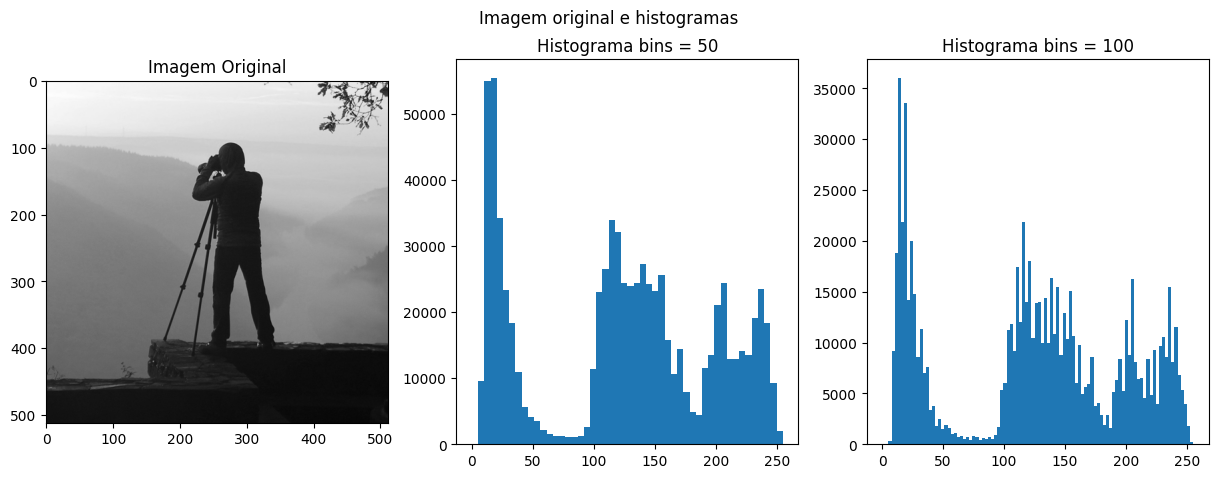

In [ ]:
## -- Seu código começa AQUI -- ##
img = cv.imread("fotografo.tif")

#mostrar todas as imagens em subplots
plt.figure(figsize=(15,5))
plt.suptitle("Imagem original e histogramas")
plt.subplot(1,3,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.title("Histograma bins = 50")
plt.hist(img.flatten(),bins=50,density=False,range=(0,255)) #histograma bins 50
plt.subplot(1,3,3)
plt.title("Histograma bins = 100")
plt.hist(img.flatten(),bins=100,density=False,range=(0,255)) #histograma bins 100
plt.show()
## -- Seu código termina AQUI -- ##

########################################################################################################################################################################
#COMENTÁRIO: Ao Aumentar a quantidade de bins, percebe-se que mais detalhes no histograma, ou seja, é possível ver de maneira mais clara a distribuição
#dos valores dos valores dos pixels da imagem.
########################################################################################################################################################################

### 2) Transformação de intensidades (Nota: 2.0/10.0)

As técnicas de processamento no domínio espacial operam diretamente nos pixels da imagem. A expressão geral para a função de transformação nos níveis de cinza pode ser dada por:

$$g(x,y) = T[f(x,y)],$$

sendo $f(x,y)$ a imagem de entrada e $g(x,y)$ a imagem de saída ou imagem processada. $T$ é um operador em $f$.


2.1) Transformação linear:

Um exemplo de função de transformação é a linear, tal que:

$$g(x,y) = c \times f(x,y) + b,$$

onde $c$ é uma constante que controla o contraste, e $b$, o brilho.

**Exercício:**

1. Aplique uma transformação linear na imagem ```polem_baixo_contraste.bmp``` de modo a alargar seu histograma para toda a faixa de valores de dados do tipo ```uint8```. Ou seja, encontre um valor de $c$ e $b$ para que a imagem esteja na faixa de 0 a 255.

2. Mostre as imagens e os respectivos histogramas antes e depois da transformação. Lembre-se de alterar os limites de visualização da imagem para o range todo para visualizar o efeito do alargamento. Comente o resultado.

3. A partir do resultado anterior, aplique uma transformação linear na mesma imagem afim de gerar o seu negativo. Mostre a imagem.

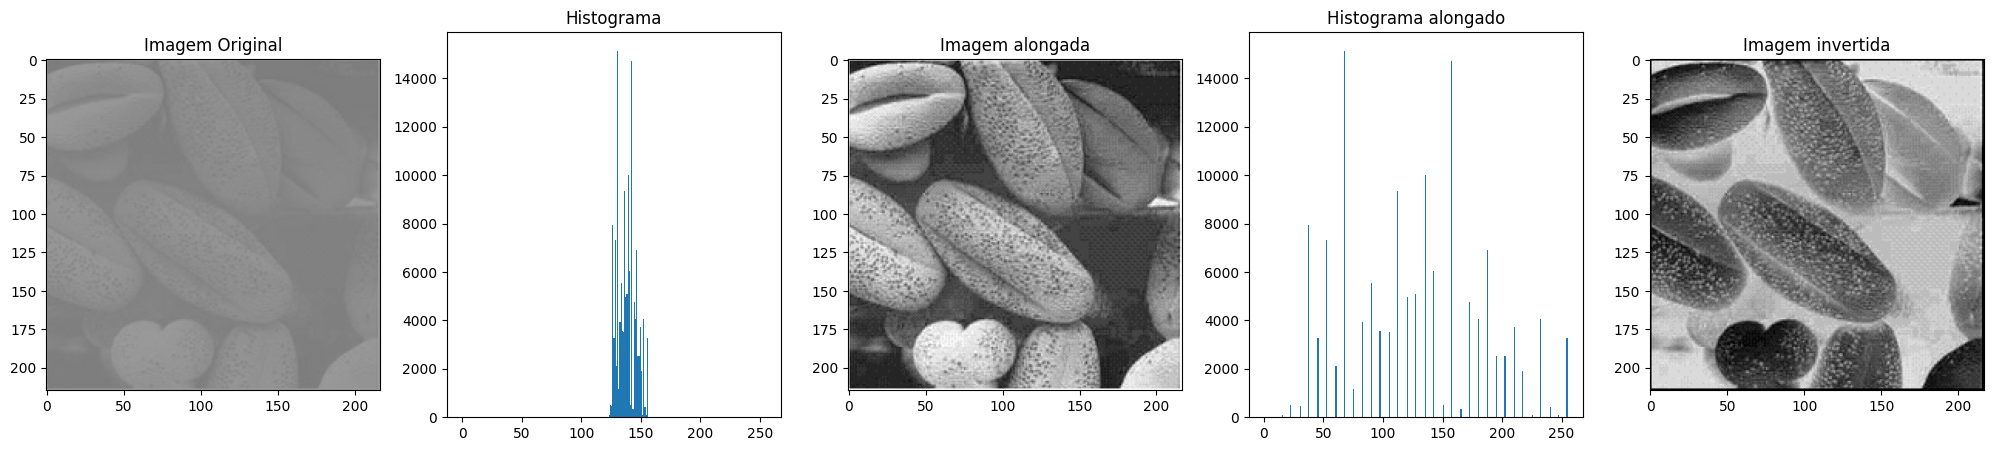

In [ ]:
## -- Seu código começa AQUI -- ##
def alonga(img, hist):
  img_in = img.copy().astype('float32') #copia a img para a variável img_in
  out = (img_in-np.min(img))*(255./(np.max(img)-np.min(img))) #g(x,y) = (f(x,y)-A)*(L-1)/(B-A)
  out = out.astype('uint8') #A imagem normalizada é convertida denovo para o formato original que era uint8
  return out

def inverte(img):
  img_in = img.copy().astype('float32') #copia a img para a variável img_in
  out = 255.-img_in #transformação linear bem simples b = 255. e c = -1
  out = out.astype('uint8') #A imagem normalizada é convertida denovo para o formato original que era uint8
  return out

img = cv.imread("polem_baixo_contraste.bmp")#ler a imagem original

#mostrar todas as imagens em subplots
plt.figure(figsize=(25,5))
plt.subplot(1,5,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255) #mostra a imagem original

plt.subplot(1,5,2)
plt.title("Histograma")
hist = plt.hist(img.flatten(),bins=255,density=False,range=(0,255)) #histograma bins 50

img2 = alonga(img, hist) #imagem alongada
plt.subplot(1,5,3)
plt.title("Imagem alongada")
plt.imshow(img2,'gray', vmin=0, vmax=255) #mostrar a imagem invertida

plt.subplot(1,5,4)
plt.title("Histograma alongado")
plt.hist(img2.flatten(),bins=255,density=False,range=(0,255)) #histograma bins 50

plt.subplot(1,5,5)
plt.title("Imagem invertida")
plt.imshow(inverte(img2),'gray', vmin=0, vmax=255) #mostrar a imagem invertida
plt.show()

## -- Seu código termina AQUI -- ##

#COMENTÁRIO: Ao alongar o histograma, percebe-se uma melhora muito grande na visualização da imagem. Também fica evidente no segundo histograma plotado
#o efeito do alargamento.

2.2) Transformação não-linear:

Agora, iremos analisar algumas transformações não-lineares. Um exemplo clássico é a transformação logarítmica ($log$). Sua fórmula geral é dada por:

$$g(x,y) = c * log(f(x,y) + 1),$$

onde $c$ é uma constante. A figura 2 ilustra essa transformação, bem como algumas outras transformações já mencionadas em sala de aula.

<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_03/log.png?raw=true" width="353" height="320"></center>

<center><caption><b>Figura 2:</b> Exemplos de transformações ponto a ponto.</b></caption></center>
<caption><center> Referência: Gonzalez and Woods, Digital Image Processing 3rd.</center></caption>

Outro exemplo é a transformação *gamma*, dada por:

$$g(x,y) = c * f(x,y)^\gamma$$

onde $c$ tambem é uma constante. Como no caso da transformação logarítmica, curvas de transformação de potência com valores de $\gamma$ menores que 1 mapeiam uma faixa estreita de valores escuros de entradas em uma faixa mais ampla de valores de saída, com o oposto se aplicando a valores mais altos de níveis de entrada. A figura 3 ilustra como são os formatos das curvas com diferentes valores de *gamma*.

<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_03/gamma.png?raw=true" width="365" height="330"></center>

<center><caption><b>Figura 3:</b> Curvas com diferentes valores de *gamma*.</b></caption></center>
<caption><center>Referência: Gonzalez and Woods, Digital Image Processing 3rd.</center></caption>


**Exercício:**

1. Utilizando a imagem ```mriphantom.tif```, execute as seguintes transformações não-lineares, encontrando o valor mais adequado para a constante c de forma que os níveis de cinza abranjam todo o range de intensidade considerando resolução de 8 bits:

*   ```G1 = np.uint8(c * np.log10(img + 1.0))```
*   ```G2 = np.uint8(c * (img ** 0.25))```

2. Mostrar as imagens e os histogramas resultantes de cada uma das transformações acima.
3. Comente os resultados encontrados para cada uma delas, explicando o que a transformação utilizada fez com os níveis de cinza da imagem em relação ao contraste e brilho.


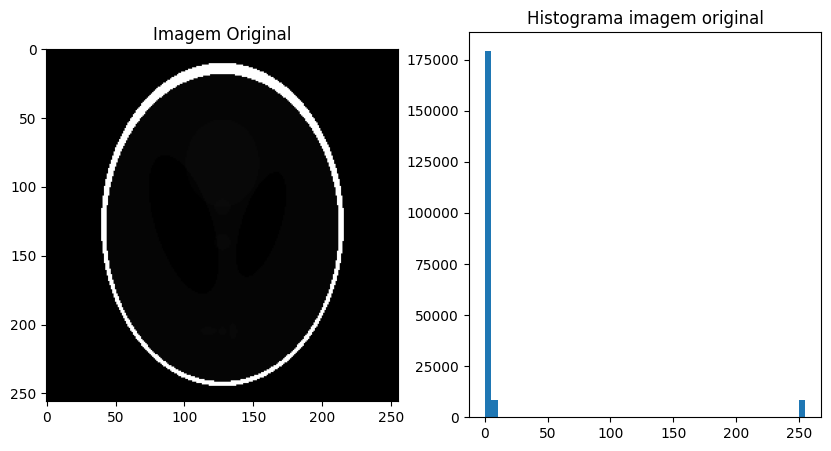

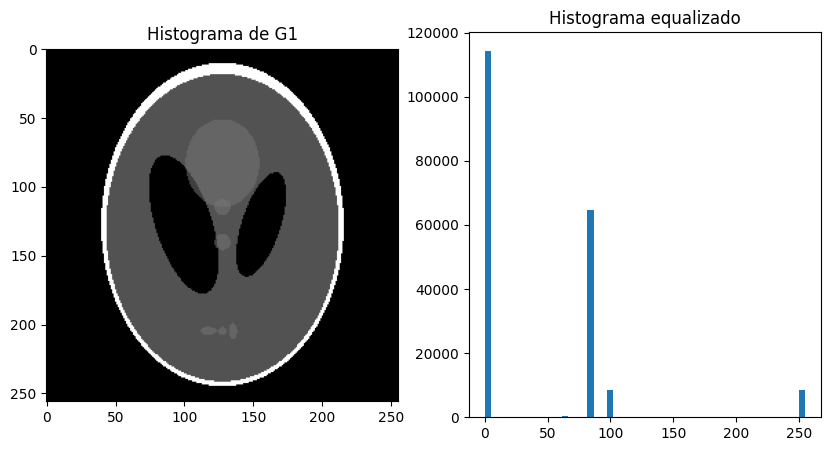

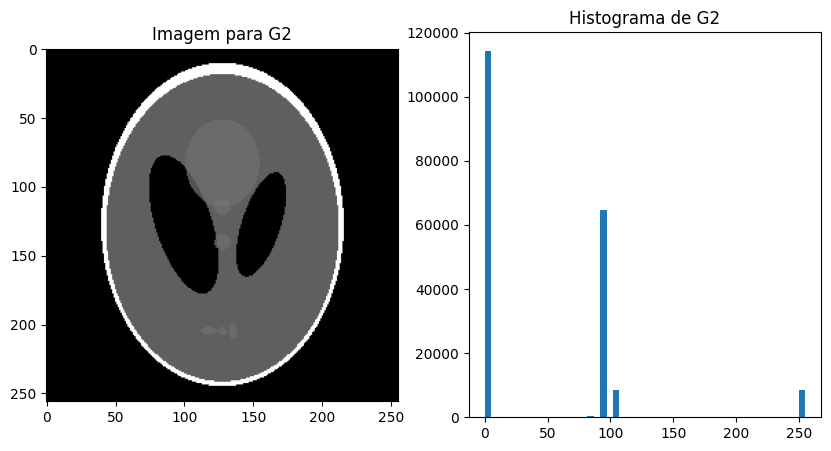

In [ ]:
## -- Seu código começa AQUI -- ##
img = cv.imread("mriphantom.tif")#ler a imagem original

c2 = 255/(np.max(img)**0.25)
img3 = np.uint8(c2 * (img ** 0.25))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255) #mostra a imagem original

plt.subplot(1,2,2)
plt.title("Histograma imagem original")
hist = plt.hist(img.flatten(),bins=50,density=False,range=(0,255)) #histograma bins 50
plt.show()

print("\n")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Histograma de G1")
plt.imshow(img2,'gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title("Histograma equalizado")
hist = plt.hist(img2.flatten(),bins=50,density=False,range=(0,255)) #histograma bins 50
plt.show()

print("\n")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Imagem para G2")
plt.imshow(img3,'gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title("Histograma de G2")
hist = plt.hist(img3.flatten(),bins=50,density=False,range=(0,255)) #histograma bins 50

## -- Seu código termina AQUI -- ##

#COMENTÁRIO: A transformação log tende a aumentar a faixa de intensidade das áreas mais escuras, tornando-as mais visíveis, enquanto mantém as áreas mais claras com menos alteração. Já a
#transformação gamma é usada para ajustar o contraste da imagem, realçando as diferenças de intensidade nas áreas escuras ou claras, ou em toda a imagem. Os histogramas demonstram as diferenças
# principalmente nas barras centrais perto ao 100.



### 3) Equalização de histograma (Nota: 1.0/10.0)

**Exercício:**

1. Faça a equalização de histograma da imagem ```polem_baixo_contraste.bmp``` utlizando a função [cv.equalizeHist](https://docs.opencv.org/2.4/modules/imgproc/doc/histograms.html?highlight=equalizehist#equalizehist) do OpenCV.

2. Mostre as imagens e os respectivos histogramas (antes e depois da equalização). Comente os resultados. Nota-se diferença com relação ao alargamento de histograma realizado anteriormente com a mesma imagem?


''

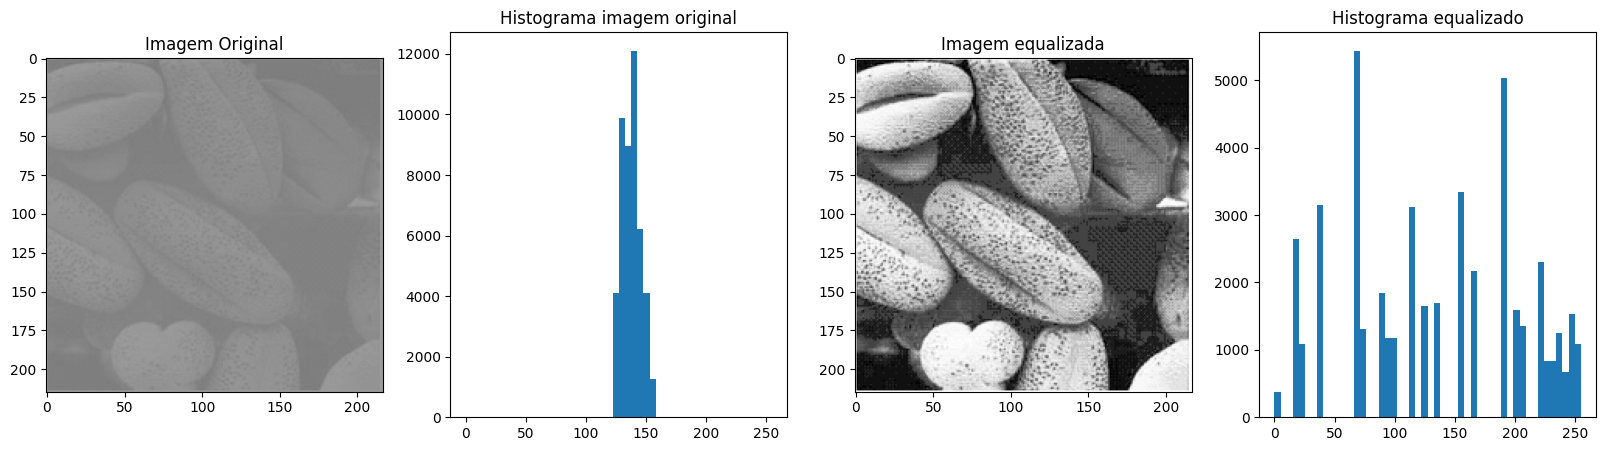

In [ ]:
## -- Seu código começa AQUI -- ##

img = cv.imread("polem_baixo_contraste.bmp", cv.IMREAD_GRAYSCALE)#ler a imagem original em escala de cinza para poder equalizar
img_equalizada = cv.equalizeHist(img)

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255) #mostra a imagem original

plt.subplot(1,4,2)
plt.title("Histograma imagem original")
hist = plt.hist(img.flatten(),bins=50,density=False,range=(0,255)) #histograma bins 50

plt.subplot(1,4,3)
plt.title("Imagem equalizada")
plt.imshow(img_equalizada,'gray', vmin=0, vmax=255) #mostrar a imagem invertida

plt.subplot(1,4,4)
plt.title("Histograma equalizado")
plt.hist(img_equalizada.flatten(),bins=50,density=False,range=(0,255)) #histograma bins 50
,
## -- Seu código termina AQUI -- ##

#COMENTÁRIO: É visível a diferença entre imagem e histograma originais e imagem e histograma equalizados. Também ocorre o alongamento. Em relação ao histograma alongado
# algumas diferenças são perceptíveis, o equalizado é um pouco mais espaçado que o alongado. E a imagem também tem algumas diferenças visuais, como é esperado.

### 4) Binarização (Nota: 1.5/10.0)

**Exercicio:**

1. Visualize o histograma da imagem `palavrascruzadas.tif` e defina um limiar (*threshold*) para binarização.

2. Implemente um código (*com técnicas regulares de programação Python*) que realize a operação de transformação para imagem binária, com base no limiar que você definiu. O objetivo é separar ao máximo o que é considerado como peça do que é letra, ou fundo da imagem.

2. Apresente a imagem binarizada resultante.

3. Uma outra forma de binarizar a imagem é utilizando algoritmos que buscam um limiar (*threshold*) de forma automática. É o caso, por exemplo, do método de Otsu ([informações sobre o método aqui](https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html))

  *   A função [cv.threshold](https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57) - [exemplos aqui](https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html) - permite fazer uso dessa técninca, ao passar os argumentos conforme abaixo.
  *   *Ex:*
  ``` python
  th_value,img = cv.threshold(myImg, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
  ```
  em que ```th_value``` receberá o valor do *threshold* encontrado e ```img``` a imagem binarizada

4. Implemente um código (*utilizando a função cv.threshold com método de Otsu*) que realize a operação de binarização da imagem original.

5. Apresente a imagem binarizada resultante.

6. Comente os resultados, comparando as duas formas de encontrar o limiar (*threshold*).


In [ ]:
## -- Seu código começa AQUI -- ##
img =cv.imread("palavrascruzadas.tif", cv.IMREAD_GRAYSCALE) #ler a imagem em escala de cinza
hist = plt.hist(img.flatten(),bins=100,density=False,range=(0,255)) #histograma bins 50
plt.show() #mostra o histograma
print("\n")

img =cv.imread("palavrascruzadas.tif", cv.IMREAD_GRAYSCALE) #ler a imagem em escala da de cinza
plt.imshow(img,'gray', vmin=0, vmax=255) #mostra a imagem original
plt.title("Imagem Original")
plt.show() #mostra a imagem original
print("\n")

plt.imshow(np.where(img < 170, 0, 255),'gray', vmin=0, vmax=255) #mostra a imagem original
plt.title("Imagem threshold manual")
plt.show() #binarizado manual
print("\n")

#Usando o threshold automaticamente
th_value,img2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) #aplicar o threshold
plt.imshow(img2,'gray', vmin=0, vmax=255) #mostra a imagem nova
plt.title("Imagem com Threshold automático")
plt.show() #mostra a imagem com threshold automático

## -- Seu código termina AQUI -- ##
#COMENTÁRIO: O threshold automático funciona muito bem, mas manualmente, é possível refinar um pouco mais a binarização. Porém, usar a função economiza um bom tempo.
#o valor de threshold retornado para essa imagem pela função é 129,  o utilizado manualmente foi 170.

# **Transformação por vizinhança**

Transformações por vizinhança se dão por meio da combinação das intensidades de um certo número de pixels (janela ou *kernel*), a fim de computar o valor da nova intensidade na imagem de saída. A Figura 4 ilustra como se dá esse processo através da convolução espacial.

<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_03/convolucao.gif?raw=true" style="width:650px;height:300px;"></center>

<center><caption><b> Figura 4:</b> Ilustração da convolução de um filtro em uma imagem.</b></caption></center>

Na figura acima foi utilizado um *kernel* do tipo:

\begin{equation}
K =
\begin{bmatrix}
1 & 0 & 1\\
0 & 1 & 0\\
1 & 0 & 1
\end{bmatrix}
\end{equation}

Quando o filtro está na primeira posição, a equação matemática para se obter o valor 4 é dada por:

$$g(x,y) = 1 \times 1  +  0 \times 1  + 1 \times 1  + 0 \times 0  + 1 \times 1  + 0 \times 1  + 1 \times 0  + 0  \times 0  + 1 \times 1.$$

É importante notar que no domínio do espaço a diferença entre a Convolução e a Correlação Cruzada reside apenas no espelhamento do Template (*kernel*) a ser utilizado, que deve ser feito na Convolução. Como, em geral, os Templates são simétricos, a equação da Correlação Cruzada tem sido empregada com o nome de Convolução na área de Processamento de Imagens.

Como pode ser observado na animação acima, caso a borda da imagem não seja tratada, a imagem resultante tem um tamanho menor. Esse tamanho pode ser calculado por meio da equação:

$$ g_n = n + 2 \times p - k + 1,$$

onde $n$ é o número de linhas da imagem original, $p$ o número de pixels utilizados no *padding* e $k$ é o tamanho do *kernel* (geralmente quadrado). No caso acima, $n = 5$, $p = 0$ e $k = 3$, resultando em uma imagem de $3\times3$. Para evitar esse problema é necessário utilizar o *padding* com o valor $p = 1$. O mesmo se dá para as colunas da imagem.

Referências:

*   Material da sala de aula;
*   OpenCV: [Smoothing Images](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html).

### 5) Filtro Passa Baixa (Nota: 1.5/10)

**Exercício:**

1. A imagem ```board_ruido.tif``` está contaminada com ruído *gaussiano* de média zero e desvio padrão 100. Implemente um código que atenue o ruído da imagem dada utilizando:

  *   Filtro da média ```3x3```.
  *   Filtro da média ```9x9```.
  *   Filtro da média ```12x12```.

2. Comente os resultados.

*Dicas:*

*    Considere o exemplo do *kernel* $K$ de um filtro espacial da média apresentado abaixo:
    \begin{equation}
    K = \frac{1}{9}
    \begin{bmatrix}
    1 & 1 & 1\\
    1 & 1 & 1\\
    1 & 1 & 1
    \end{bmatrix}
    \end{equation}

    Pode-se utilizar a declaração de array da biblioteca *numpy* para declarar K como uma matriz da seguinte maneira:

    ``` python
    kernel = np.array(((1, 1, 1),
                        (1, 1, 1),
                        (1, 1, 1))) / 9
    ```
 ou
    ``` python
    kernel = np.ones((3,3)) / 9
    ```
*   Utilize a função [cv.filter2D](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) para fazer a convolução com o *kernel*.

    ``` python
    cv.filter2D(myImg, -1, myKernel)
    ```

*   Mostre as imagens na faixa de ```0-255 ```.

**Observação**

1. Ao trabalhar com filtros convolucionais, é essencial garantir que a imagem a ser filtrada seja de um "tipo" de variável que contemple números "quebrados", tal como o tipo ```float```.

2. Sendo assim, nos exercícios abaixo, ao ler a imagem utilizando a função ```cv.imread()```, vamos adicionar um código que fará a variável ser do tipo ```float```.

3. Para isto, basta adicionarmos o termo ```.astype('float')``` , conforme a primeira linha do código abaixo.

4. Esta forma de utilizar a variável que contém a imagem é muito utilizada em processamentos de imagem.

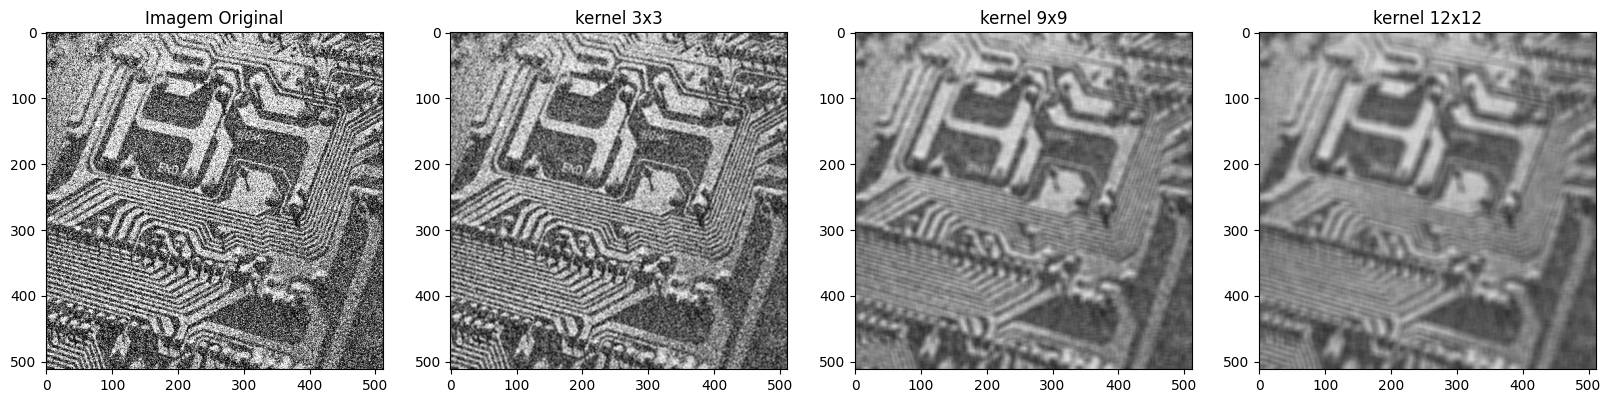

In [ ]:
## -- Seu código começa AQUI -- ##

def convoluciona(size1, size2, img):
  img2 = img.copy()
  kernel = np.ones((size1,size2)) / (size1*size2)
  img3 = cv.filter2D(img2, -1, kernel)
  return img3

img = cv.imread("board_ruido.tif", cv.IMREAD_GRAYSCALE).astype('float') #ler a imagem como float e na escala de cinza

#plots em subplots
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255) #mostra a imagem original

plt.subplot(1,4,2)
plt.title("kernel 3x3")
plt.imshow(convoluciona(3,3,img), 'gray', vmin=0,vmax=255) #convolução com o kernel 3x3

plt.subplot(1,4,3)
plt.title("kernel 9x9")
plt.imshow(convoluciona(9,9,img), 'gray', vmin=0,vmax=255) #convolução com o kernel 9x9

plt.subplot(1,4,4)
plt.title("kernel 12x12")
plt.imshow(convoluciona(12,12,img), 'gray', vmin=0,vmax=255)#convolução com o kernel 12x12
plt.show()

## -- Seu código termina AQUI -- ##

#COMENTÁRIO: Fica eviente que ao aumentar o kernel, as imagens estão tendo o ruido diminuido. No 3x3 a diferença é pouco perceptível
#no 12x12 a diferença é maior

### 6) Filtro passa-alta (Nota: 2.0/10.0)

**Exercício:**

1. Aplique o *kernel* de um filtro espacial passa-alta na imagem ```armadura.tif``` a fim de adquirir as altas frequências da imagem. Apresente a imagem resultante e, para melhor visualização, seu negativo. Você pode criar o filtro como orientado no exercício anterior, mas agora para passa-alta.

2. Modifique esse *kernel* a fim de torná-lo um filtro de aguçamento e aplique-o na imagem. Apresente a imagem resultante e comente os resultados.



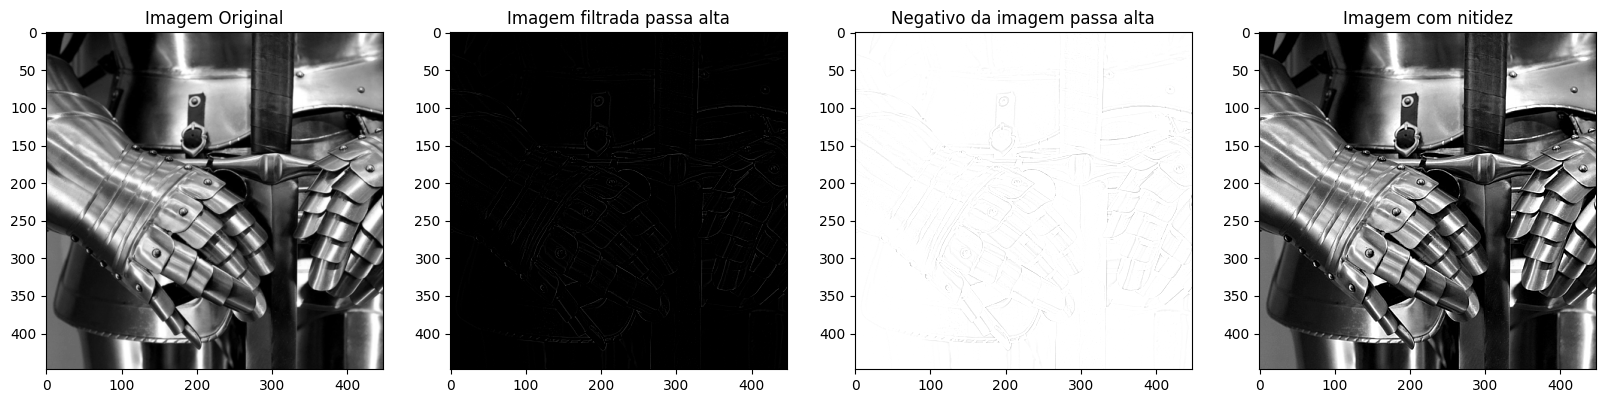

In [ ]:
## -- Seu código começa AQUI -- ##

def passa_alta(img):
  img2 = img.copy()
  kernel = np.array(((-1, -1, -1),
                   (-1, 8, -1),
                   (-1, -1, -1)))/9
  img3 = cv.filter2D(img2, -1, kernel)
  return img3

def agucamento(img):
  img2 = img.copy()
  kernel = np.array(((-1, -1, -1),
                   (-1, 8, -1),
                   (-1, -1, -1)))/9

  kernel2 = np.array(((0, 0, 0),
                   (0, 9, 0),
                   (0, 0, 0)))/9

  kernel_final = kernel+kernel2

  img3 = cv.filter2D(img2, -1, kernel_final)

  return img3


img = cv.imread("armadura.tif", cv.IMREAD_GRAYSCALE).astype('float') #ler a imagem como float e na escala de cinza

#plots em subplots
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255) #mostra a imagem original

plt.subplot(1,4,2)
plt.title("Imagem filtrada passa alta")
plt.imshow(passa_alta(img), 'gray', vmin=0,vmax=255) #convolução com o kernel 3x3

plt.subplot(1,4,3)
plt.title("Negativo da imagem passa alta")
plt.imshow((255-passa_alta(img)), 'gray', vmin=0,vmax=255) #convolução com o kernel 9x9

plt.subplot(1,4,4)
plt.title("Imagem com nitidez")
plt.imshow(agucamento(img), 'gray', vmin=0,vmax=255)#convolução com o kernel 12x12
plt.show()

## -- Seu código termina AQUI -- ##

#COMENTÁRIO: O filtro passa alta deixou somente as bordas presentes. Ao aplicar o filtro de nitidez, percebe-se que alguns detalhes são vistos com maior clareza
#por exemplo, na mão da armadura, as bordas são mais realçadas do que na imagem original, dando o efeito de maior nitidez.

**Aplicação - Filtro Laplaciano**

A imagem da figura ```pontos.tif``` apresenta 3 pontos isolados quase imperceptíveis que podem ser detectados com um filtro passa-alta espacial.

**Exercício:**

1. Aplique filtro de *kernel* laplaciano na imagem para detectar esses pontos.

2. Faça a binarização dessa imagem para melhor visualização dos pontos. Se necessário, utilize o histograma da imagem após a filtragem para detectar um bom valor de *threshold*.

*Dicas:*

*  Você pode utilizar a função [cv.filter2D](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) para fazer a convolução com o *kernel*;

*  Você pode utilizar a função [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) para fazer a binarização.


*Ex:*
``` python
cv.filter2D(myImg, -1, myKernel)
np.where(myImg < threshold, Valor_para_TRUE, Valor_para_FALSE)
```

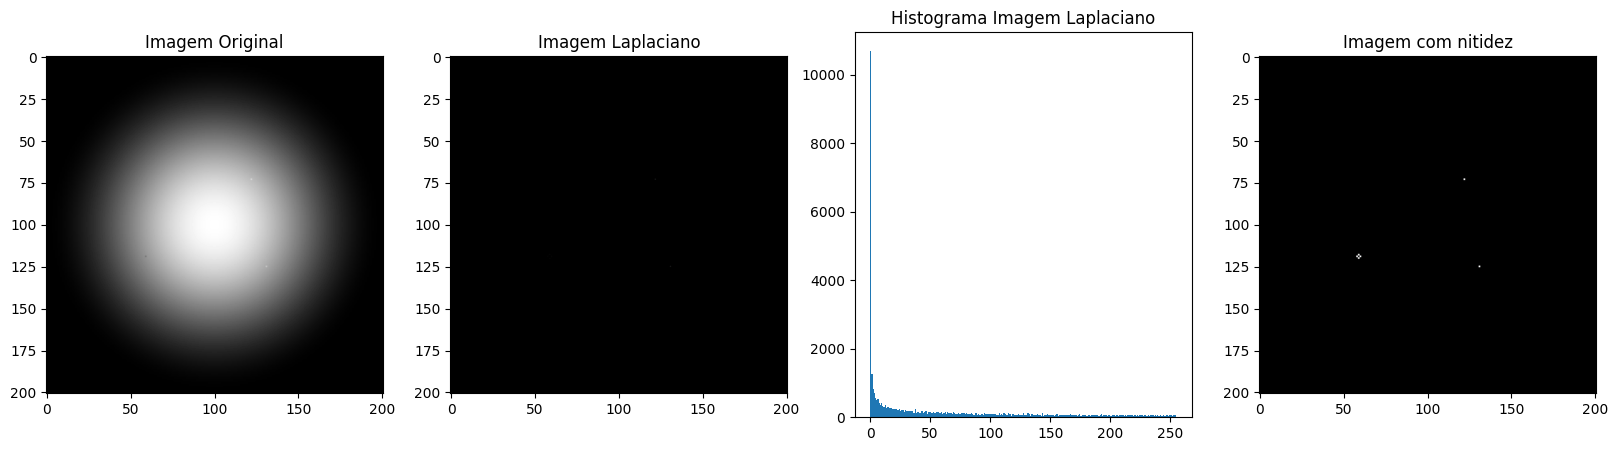

In [ ]:
## -- Seu código começa AQUI -- ##
def laplaciano(img):
  img2 = img.copy()
  kernel = np.array(((0, -1, 0),
                   (-1, 4, -1),
                   (0, -1, 0)))/5
  img3 = cv.filter2D(img2, -1, kernel)
  return img3

img = cv.imread("pontos.tif", cv.IMREAD_GRAYSCALE).astype('float') #ler a imagem como float e na escala de cinza

#plots em subplots
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255) #mostra a imagem original

plt.subplot(1,4,2)
plt.title("Imagem Laplaciano")
plt.imshow(laplaciano(img), 'gray', vmin=0,vmax=255)

plt.subplot(1,4,3)
plt.title("Histograma Imagem Laplaciano")
hist = plt.hist(img.flatten(),bins=255,density=False,range=(0,255))

plt.subplot(1,4,4)
plt.title("Imagem com nitidez")
plt.imshow(np.where( laplaciano(img)<3, 0, 255), 'gray', vmin=0,vmax=255)
plt.show()

## -- Seu código termina AQUI -- ##

#COMENTÁRIO: Ao aplicar o filtro laplaciano realça regiões onde ocorrem mudanças significativas na intensidade dos pixels. O histograma mostra onde aconteceu essa mudança.
#Com isso, é possível detectar o valor de threshold. Na imagem com nitidez o valor de threshold deixa os pontos nitidos.

### 7) Processamento do pixel da borda (Nota: 1.5/10.0)
**Exercício:**

1. Filtre a imagem *img* dada abaixo, utilizando um filtro da média 5x5. Utilize as seguintes soluções para a borda:

  *   *Padding* com zeros;
  *   *Padding* simétrico;
  *   *Padding* replicado;

2. Mostre as imagens resultantes e comente as diferenças encontradas. Não se esqueça de definir vmin e max para melhor visualizar as diferenças.

*Dicas:*
  *   Você pode utilizar a função [cv.blur](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37) para o filtro da média;
  *   Neste [link](https://docs.opencv.org/master/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5) você pode encontrar os tipos de *padding* utilizados no OpenCV. O tipo ```BORDER_CONSTANT``` tem como padrão o valor 0.

*Ex:*
``` python
cv.blur(myImg, (ksize,ksize), borderType=TipoDePadding)
```



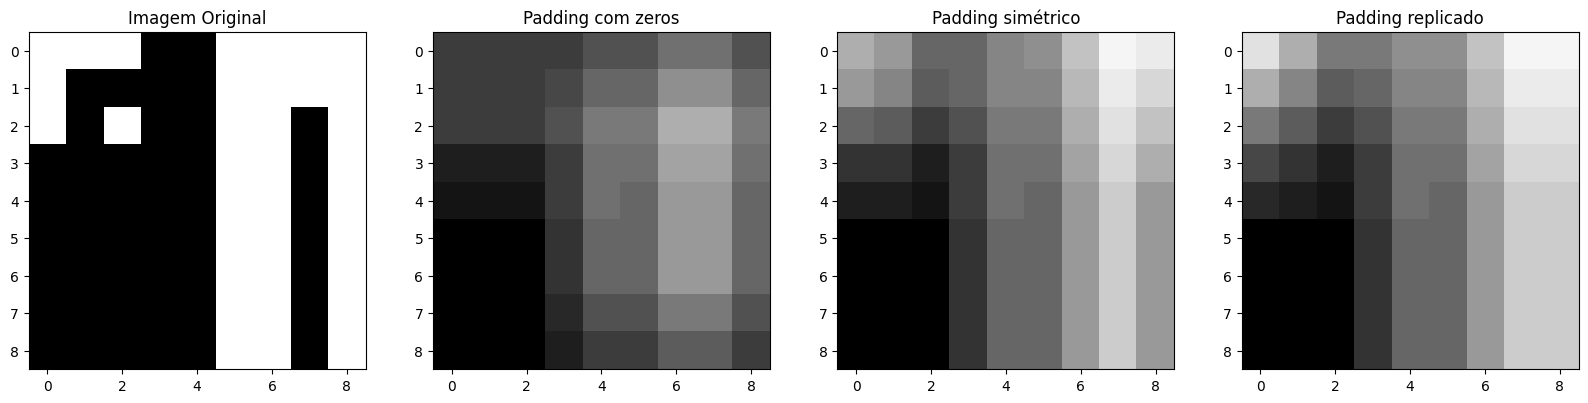

(9, 9)


In [ ]:
#Imagem fornecida
img = np.array(((255, 255, 255, 0, 0, 255, 255, 255, 255),
                (255, 0,   0,   0, 0, 255, 255, 255, 255),
                (255, 0,   255, 0, 0, 255, 255, 0, 255),
                (0,   0,   0,   0, 0, 255, 255, 0, 255),
                (0,   0,   0,   0, 0, 255, 255, 0, 255),
                (0,   0,   0,   0, 0, 255, 255, 0, 255),
                (0,   0,   0,   0, 0, 255, 255, 0, 255),
                (0,   0,   0,   0, 0, 255, 255, 0, 255),
                (0,   0,   0,   0, 0, 255, 255, 0, 255))).astype('float')


## -- Seu código começa AQUI -- ##

img2 = cv.blur(img, (5,5), borderType=cv.BORDER_CONSTANT)
img3 = cv.blur(img, (5,5), borderType=cv.BORDER_REFLECT)
img4 = cv.blur(img, (5,5), borderType=cv.BORDER_REPLICATE)


plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title("Imagem Original")
plt.imshow(img,'gray', vmin=0, vmax=255) #mostra a imagem original

plt.subplot(1,4,2)
plt.title("Padding com zeros")
plt.imshow(img2,'gray', vmin=0, vmax=255)

plt.subplot(1,4,3)
plt.title("Padding simétrico")
plt.imshow(img3, 'gray', vmin=0,vmax=255)

plt.subplot(1,4,4)
plt.title("Padding replicado")
plt.imshow(img4, 'gray', vmin=0,vmax=255)

plt.show()
## -- Seu código termina AQUI -- ##

#COMENTÁRIO: As diferenças entre as imagens são claramente visíveis. Principalmente na parte superior esquerda. Também é perceptível na faixa lateral direita.
#As tonalidades dentro da escala de cinza mudam nessas regiões. Isso era esperado, visto que os preenchimentos são diferentes e para cada um temos um resultado.